# To Explore Decision Tree Algorithm
TASK

For the ‘Iris’ dataset, create the Decision Tree classifier and visualize it graphically. The purpose is if we feed any new data to this classifier, it would be able to predict the right class accordingly.

The iris dataset contains measurements for 150 iris flowers from three different species.

The three classes in the Iris dataset:

Iris-setosa (n=50)

Iris-versicolor (n=50)


Iris-virginica (n=50)


The four features of the Iris dataset:

sepal length in cm

sepal width in cm

petal length in cm

petal width in cm



In [39]:
# importing the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [40]:
iris = sns.load_dataset('iris')

In [41]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [42]:
# getting some more information on our dataset 
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
sepal_length    150 non-null float64
sepal_width     150 non-null float64
petal_length    150 non-null float64
petal_width     150 non-null float64
species         150 non-null object
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [43]:
#Exploratory Data Analysis

In [44]:
# obtaining a statistical description of the dataset
iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


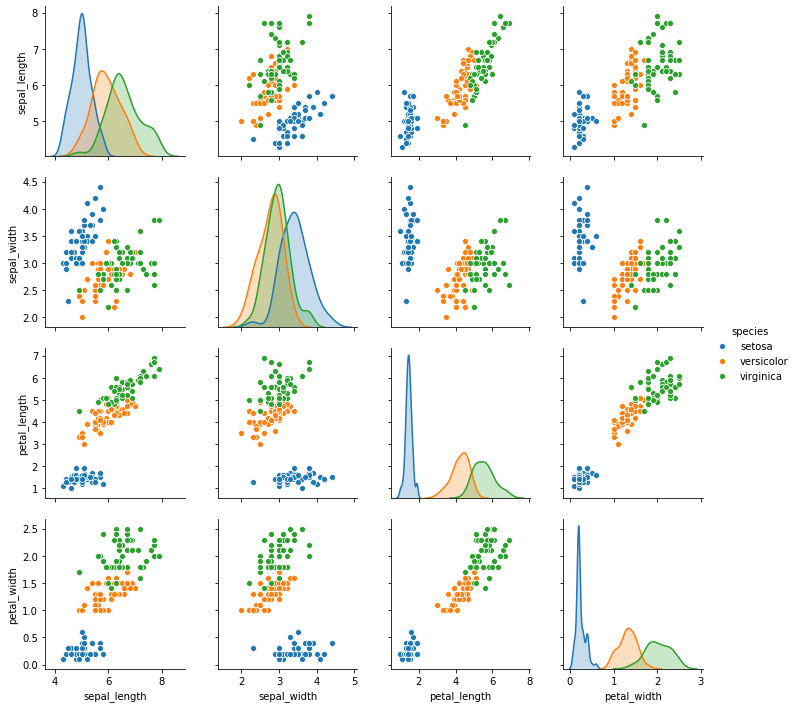

In [45]:
sns.pairplot(iris, hue='species')

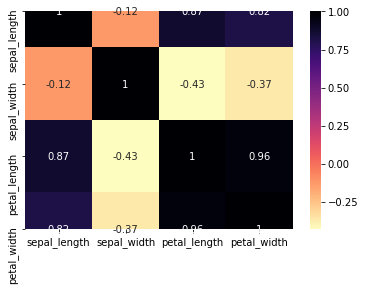

In [46]:
sns.heatmap(iris.corr(), cmap='magma_r', annot=True)

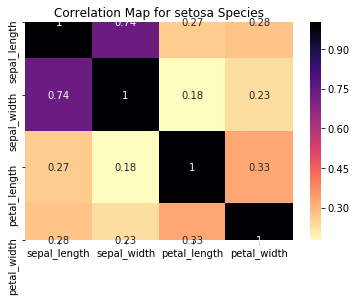

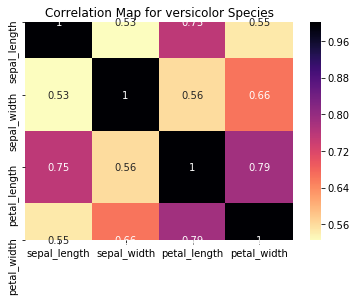

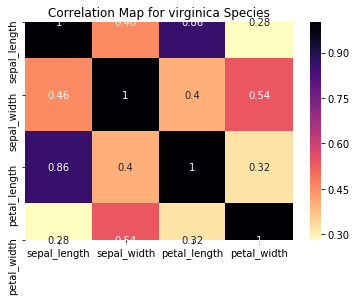

In [47]:
sns.heatmap(iris[iris['species']=='setosa'].corr(), cmap='magma_r', annot=True)
plt.title('Correlation Map for setosa Species')
plt.show()

sns.heatmap(iris[iris['species']=='versicolor'].corr(), cmap='magma_r', annot=True)
plt.title('Correlation Map for versicolor Species')
plt.show()

sns.heatmap(iris[iris['species']=='virginica'].corr(), cmap='magma_r', annot=True)
plt.title('Correlation Map for virginica Species')
plt.show()

In [48]:
#Preparing the Data

In [49]:
X = iris.drop('species', axis=1)
y = iris['species']

In [50]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [51]:
#Train the model

In [52]:
from sklearn.tree import DecisionTreeClassifier

In [53]:
dt = DecisionTreeClassifier()

In [54]:
# fitting our model to the training data
dt.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [55]:
predictions = dt.predict(X_test)

In [56]:
#Evaluate the model dt

In [57]:
from sklearn.metrics import classification_report, confusion_matrix

In [58]:
print('Classification Report of the Model is as follows:\n')
print(classification_report(y_test, predictions))
print()
print('Confusion matrix: \n')
print(confusion_matrix(y_test, predictions))

Classification Report of the Model is as follows:

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        15
  versicolor       1.00      1.00      1.00        11
   virginica       1.00      1.00      1.00        12

    accuracy                           1.00        38
   macro avg       1.00      1.00      1.00        38
weighted avg       1.00      1.00      1.00        38


Confusion matrix: 

[[15  0  0]
 [ 0 11  0]
 [ 0  0 12]]


In [59]:
#Visualizing the Decision tree

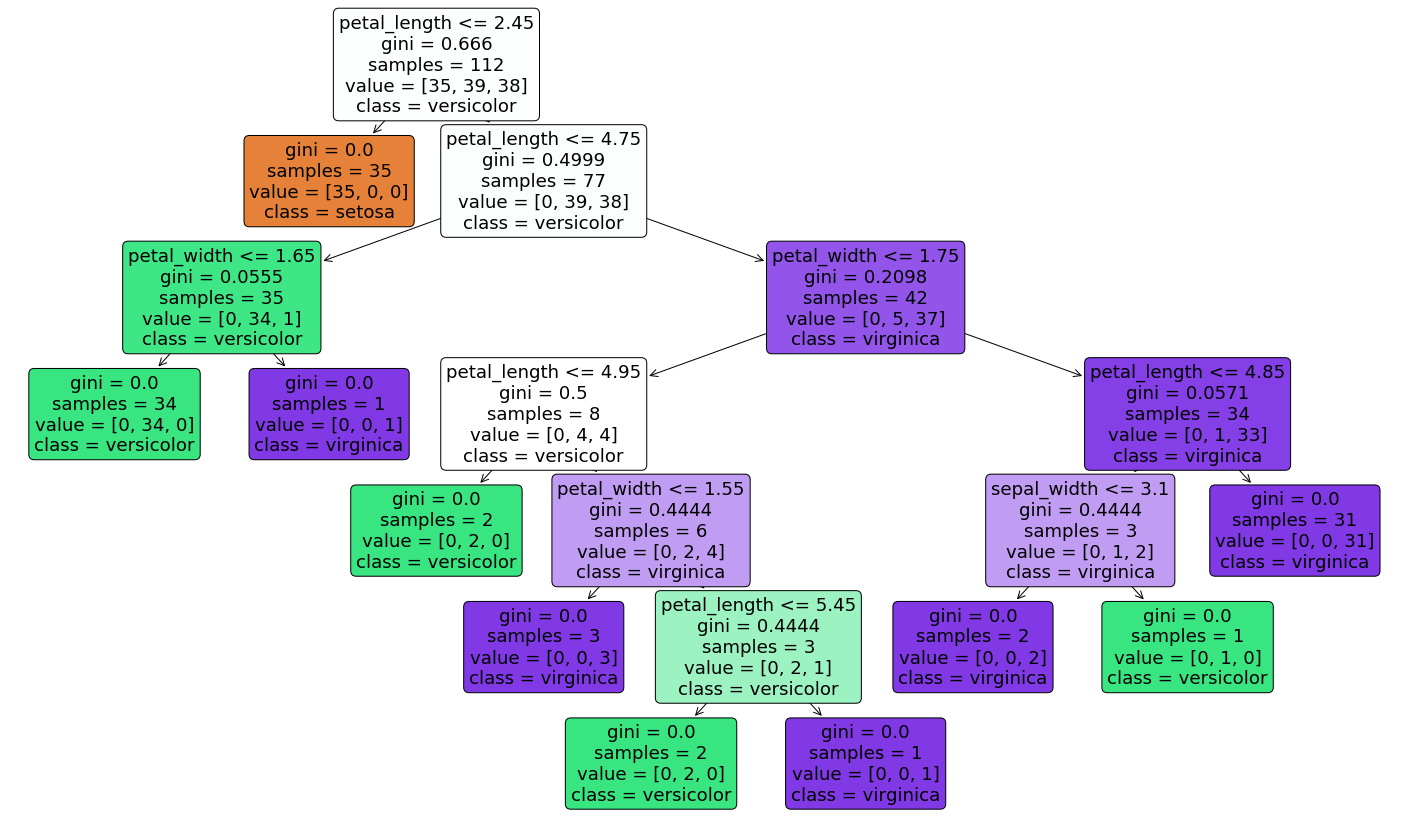

In [60]:
from sklearn.tree import plot_tree

plt.figure(figsize=(25,15))

tree_image = plot_tree(dtree,feature_names=iris.columns[:-1],class_names=iris['species'].unique().tolist(),
                       precision=4,label="all",filled=True,rounded=True)
plt.savefig('showTree')